# project 2:Sentiment Analysis

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
data = pd.read_csv("train.csv",encoding= 'unicode_escape')

In [71]:
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [72]:
data.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

### Removing the textID (we won't use it for the analysis)

In [73]:

data.drop(["textID"],axis=1,inplace=True)
data.head()

,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


### Removing the Time,Age,country,population,area and density (we won't use it for the analysis)

In [74]:

data.drop(["Time of Tweet"],axis=1,inplace=True)
data.drop(["Age of User"],axis=1,inplace=True)
data.drop(["Country"],axis=1,inplace=True)
data.drop(["Population -2020"],axis=1,inplace=True)
data.drop(["Land Area (Km²)"],axis=1,inplace=True)
data.drop(["Density (P/Km²)"],axis=1,inplace=True)
data.drop(["selected_text"],axis=1,inplace=True)
data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

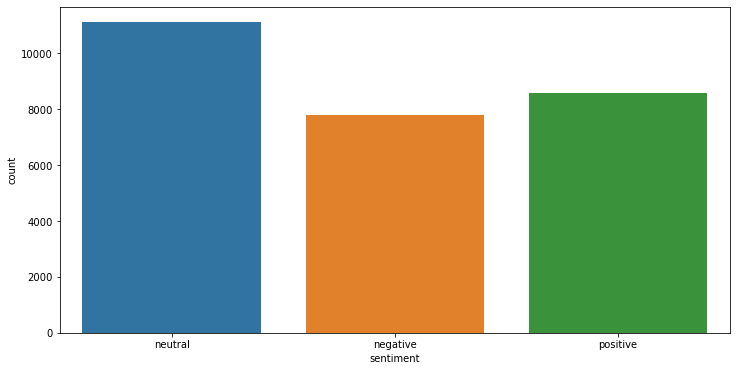

In [75]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=data)

In [76]:
df = data.dropna(axis=0, how="any")
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [77]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [78]:
temp = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


In [79]:

df['text'] = df['text'].str.lower()
df.head()

C:\Users\expert\AppData\Local\Temp\ipykernel_4648\590854788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.lower()


,text,sentiment
0,"i`d have responded, if i were going",neutral
1,sooo sad i will miss you here in san diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"sons of ****, why couldn`t they put them on t...",negative


### Define the function to remove the punctuation

In [80]:

import string 

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply to the dataframe
df['text'] = df['text'].apply(remove_punctuations)
df.head()

C:\Users\expert\AppData\Local\Temp\ipykernel_4648\1230304926.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(remove_punctuations)


,text,sentiment
0,id have responded if i were going,neutral
1,sooo sad i will miss you here in san diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,sons of why couldnt they put them on the rel...,negative


In [81]:
pip install nltk

In [82]:
pip install stop-words

In [83]:
from stop_words import get_stop_words
print(get_stop_words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

### Removing new stopwords

In [84]:

import nltk
stop =get_stop_words('english')
newStopWords = ['said','us','also','could','would','like','told','via','get','know','want','well','need','say','look','give','took','saying','many','still','think','going','become','put','might','for','got','use','go','may','much','keep','saying','let','see','make']
stop.extend(newStopWords)

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

C:\Users\expert\AppData\Local\Temp\ipykernel_4648\3430443453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


,text,sentiment
0,id responded,neutral
1,sooo sad will miss san diego,negative
2,boss bullying,negative
3,interview leave alone,negative
4,sons couldnt releases already bought,negative


In [85]:
pip install --upgrade pip

In [86]:
pip install --upgrade Pillow

In [87]:
!pip install wordcloud

### word cloud for neutral sentiment

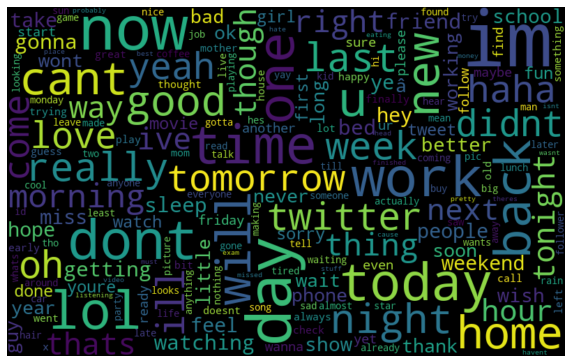

In [88]:

from wordcloud import WordCloud
fake_data = df[df["sentiment"] == "neutral"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,max_font_size = 110,collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [89]:
import regex as re
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

def remove_mentions(word):
    return re.sub(r"@\S+", "", word)

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')


In [90]:
def clean_up_pipeline(sentence):
    cleaning_data = [ remove_hyperlink,
                      replace_newline,
                      remove_number,
                      remove_whitespace,
                     ]
    for func in cleaning_data:
        
        sentence = func(sentence)
    return sentence

In [91]:
df['text'] = df['text'].apply(clean_up_pipeline)
df.head()

C:\Users\expert\AppData\Local\Temp\ipykernel_4648\753124522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(clean_up_pipeline)


,text,sentiment
0,id responded,neutral
1,sooo sad will miss san diego,negative
2,boss bullying,negative
3,interview leave alone,negative
4,sons couldnt releases already bought,negative


In [92]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(df = df_frequency, x = "Word", y = "Frequency", color = 'red')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

### Vectorizing and applying TF-IDF on Decision Tree Classifier

In [93]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 59.17%


### Vectorizing and applying TF-IDF on MultinomialNB

In [94]:
from sklearn.naive_bayes import MultinomialNB
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 62.86%


### Vectorizing and applying TF-IDF for Logistic Regression

In [95]:
 
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 68.38%


C:\Users\expert\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Vectorizing and applying TF-IDF for Random Forest Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 69.85%
